# scvelo analysis script

In [64]:
from analysis_SIM_compare_fun_notebook import *
import sys
srcdir = '/Users/wanglab/Documents/ShengyuLi/Velocity/bin/celldancer_polish/src'
sys.path.append(srcdir)
import celldancer.cdplt as cdplt

###############################################
########## cosin similarity analysis ##########
###############################################
# path: server
analysis_result_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/multi_path_new/analysis_result/'
detail_input_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/multi_path_new/velocity_result/celldancer/'
raw_input_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/multi_path_new/raw/'
scv_result_input_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/multi_path_new/velocity_result/scv/'
foldername_para=''

########## scv
# path: server
print('running scv analysis')

# for ratio in [0.4,0.6,0.8,1]:
for ratio in [0.2]:
    print(ratio)
    scVelo = get_similarity_scVelo(ratio,scv_result_input_path,raw_input_path,type='multi',path='Path2Down')
    scVelo.to_csv(analysis_result_path+'scvelo_similarity_eachCell'+str(ratio)+'.csv',index=False)
    sns.boxplot(x="ratio", y="similarity", hue='method', data=scVelo)

# celldancer analysis script

In [ ]:
from analysis_SIM_compare_fun_notebook import *
import sys
srcdir = '/Users/wanglab/Documents/ShengyuLi/Velocity/bin/celldancer_polish/src'
sys.path.append(srcdir)
import celldancer.cdplt as cdplt

###############################################
########## cosin similarity analysis ##########
###############################################
# path: server
analysis_result_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/multi_path_new/analysis_result/'
detail_input_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/multi_path_new/velocity_result/celldancer/'
raw_input_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/multi_path_new/raw/'
scv_result_input_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/multi_path_new/velocity_result/scv/'
foldername_para=''

########## celldancer
print('running celldancer analysis')

# for ratio in [0.2,0.4,0.6,0.8,1]:
# for ratio in [0.2]:
for ratio in [0.2,0.4,0.6,0.8,1]:

    print(ratio)
    cellDancer = get_similarity_cellDancer(ratio,detail_input_path,raw_input_path,type='multi',foldername_para=foldername_para,path='Path2Down')
    cellDancer.to_csv(analysis_result_path+'celldancer_similarity_eachCell'+str(ratio)+'.csv',index=False)
    sns.boxplot(x="ratio", y="similarity", hue='method', data=cellDancer)

# combine scv and celldancer error rate and plot 

1
celldancer
scv
0.8
celldancer
scv
0.6
celldancer
scv
0.4
celldancer
scv
1
celldancer
scv
0.8
celldancer
scv
0.6
celldancer
scv
0.4
celldancer
scv
1
celldancer
scv
0.8
celldancer
scv
0.6
celldancer
scv
0.4
celldancer
scv
1
celldancer
scv
0.8
celldancer
scv
0.6
celldancer
scv
0.4
celldancer
scv
1
celldancer
scv
0.8
celldancer
scv
0.6
celldancer
scv
0.4
celldancer
scv


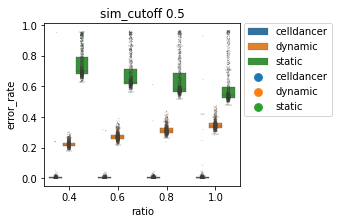

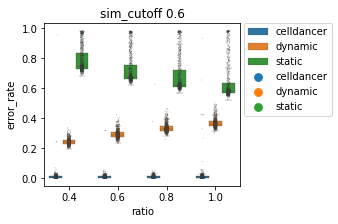

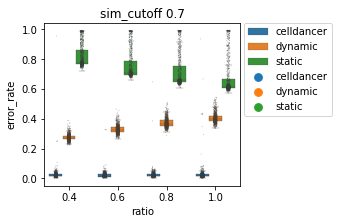

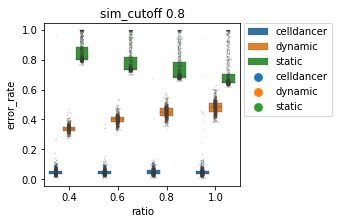

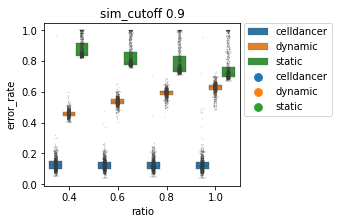

In [103]:
###################################################
########## scv and celldancer error rate ##########
###################################################

# ratio_list=[1]
ratio_list=[1,0.8,0.6,0.4]


sim_cutoff_list=[0.5,0.6,0.7,0.8,0.9]
# sim_cutoff_list=[0.7]

for sim_cutoff in sim_cutoff_list:
    celldancer_error_df_all=pd.DataFrame()
    scv_error_df_all=pd.DataFrame()
    combined_error_df=pd.DataFrame()
    for ratio in ratio_list:
        print(ratio)

        #celldancer
        print('celldancer')
        celldancer_cell=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/multi_path_new/analysis_result/celldancer_similarity_eachCell'+str(ratio)+'.csv')
        celldancer_cell.loc[celldancer_cell.similarity<=sim_cutoff,'cutoff_count']=1
        celldancer_cell.loc[celldancer_cell.similarity>sim_cutoff,'cutoff_count']=0

        error_calc_celldancer=celldancer_cell[['gene','cutoff_count']].groupby('gene').sum().reset_index()
        error_calc_celldancer['error_rate']=error_calc_celldancer.cutoff_count/len(set(celldancer_cell.cellID))
        error_calc_celldancer['method']='celldancer'
        error_calc_celldancer['ratio']=ratio

        celldancer_error_df_all=celldancer_error_df_all.append(error_calc_celldancer)

        #scv
        print('scv')
        scv_cell=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/multi_path_new/analysis_result/scvelo_similarity_eachCell'+str(ratio)+'.csv')
        scv_cell.loc[scv_cell.similarity<=sim_cutoff,'cutoff_count']=1
        scv_cell.loc[scv_cell.similarity>sim_cutoff,'cutoff_count']=0

        error_calc_dynamic=scv_cell[scv_cell['method']=='dynamic'][['gene','cutoff_count']].groupby('gene').sum().reset_index()
        error_calc_dynamic['error_rate']=error_calc_dynamic.cutoff_count/len(set(scv_cell.cellID))
        error_calc_dynamic['method']='dynamic'
        error_calc_dynamic['ratio']=ratio

        error_calc_static=scv_cell[scv_cell['method']=='static'][['gene','cutoff_count']].groupby('gene').sum().reset_index()
        error_calc_static['error_rate']=error_calc_static.cutoff_count/len(set(scv_cell.cellID))
        error_calc_static['method']='static'
        error_calc_static['ratio']=ratio

        scv_error_df=pd.concat([error_calc_dynamic,error_calc_static])
        scv_error_df_all=scv_error_df_all.append(scv_error_df)
        
        # combine celldancer and scv
    combined_error_df=pd.concat([celldancer_error_df_all,scv_error_df_all])
    combined_error_df.to_csv(('/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/multi_path_new/analysis_result/'+'error_sim'+str(sim_cutoff)+'.csv'),index=False)
    # plt.figure()
    # plt.title('sim_cutoff '+str(sim_cutoff))
    # sns.color_palette("flare", as_cmap=True)

    # sns.boxplot(x="ratio", y="error_rate", hue='method', data=combined_error_df)
    plot_box_error(combined_error_df,sim_cutoff)
    plt.savefig('/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/multi_path_new/analysis_result/'+'error_sim'+str(sim_cutoff)+'.pdf')


###################################################
#######End scv and celldancer error rate ##########
###################################################

# Wilcoxon

multi path
--------------
static
w: 0.0
p: 3.3152613097472283e-165

dynamic
w: 864.0
p: 4.4207996412356486e-164
----------------------------------------------------------------------
avg error rate
--------------
celldancer :  2.6322500000000004


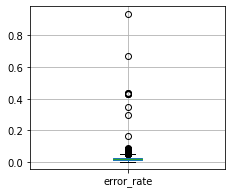

static :  67.67474999999999


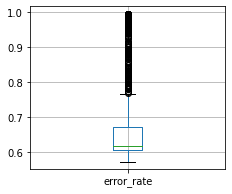

dynamic :  40.567499999999995


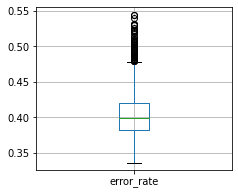

In [120]:
from scipy.stats import wilcoxon

ratio_list=[1]
for ratio in ratio_list:
    error_sim=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/multi_path_new/analysis_result/error_sim0.7.csv')
    error_sim=error_sim[error_sim.ratio==ratio]
    error_sim_cd=error_sim[error_sim.method=='celldancer']
    
    error_sim_static=error_sim[error_sim.method=='static']
    error_sim_dynamic=error_sim[error_sim.method=='dynamic']
    w_static, p_static = wilcoxon(x=error_sim_cd.error_rate,y=error_sim_static.error_rate, alternative='two-sided')
    w_dynamic, p_dynamic = wilcoxon(x=error_sim_cd.error_rate,y=error_sim_dynamic.error_rate, alternative='two-sided')
    
    print('multi path')
    print('--------------')
    print('static')
    print('w:',w_static)
    print('p:',p_static)
    print('')
    print('dynamic')
    print('w:',w_dynamic)
    print('p:',p_dynamic)
    
    print('----------------------------------------------------------------------')
    print('avg error rate')
    
    print('--------------')
    
    print('celldancer : ',np.mean(error_sim_cd.error_rate)*100)
    
    plt.figure()
    error_sim_cd.boxplot('error_rate')
    plt.show()
    
    print('static : ',np.mean(error_sim_static.error_rate)*100)
    plt.figure()
    error_sim_static.boxplot('error_rate')
    plt.show()
    
    print('dynamic : ',np.mean(error_sim_dynamic.error_rate)*100)
    plt.figure()
    error_sim_dynamic.boxplot('error_rate')
    plt.show()
    

# plot

## celldancer

In [150]:
cellDancer_df=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/multi_path_new/velocity_result/celldancer/ratio1/celldancer_estimation.csv')

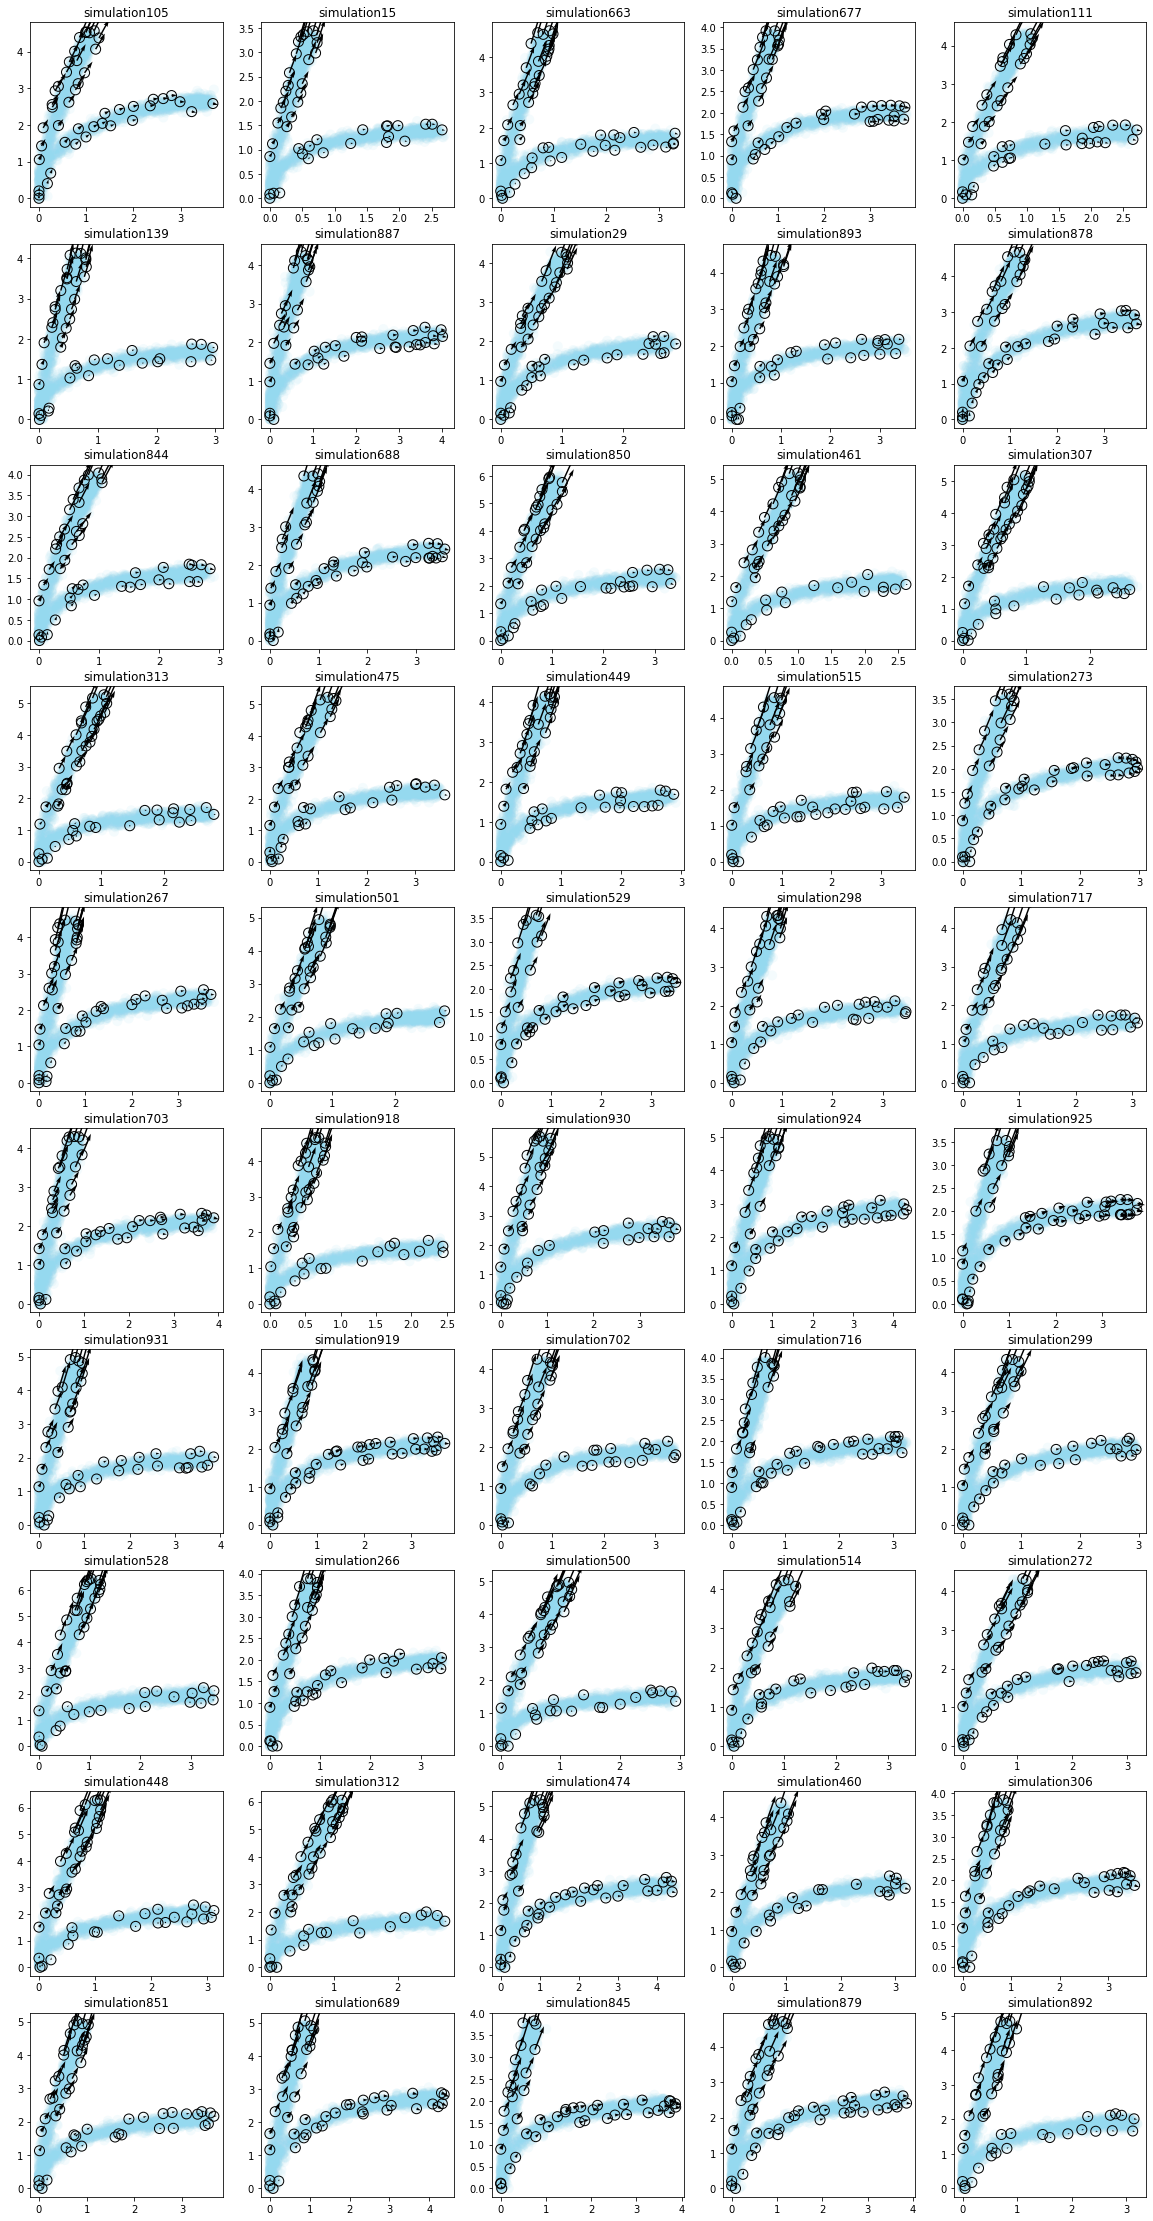

In [175]:
gene_list=list(cellDancer_df.gene_name.drop_duplicates())[0:50]
# gene_list=['simulation931']


import math
ncols=5
height=math.ceil(len(gene_list)/5)*4
fig = plt.figure(figsize=(20,height))

for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='splice',
        y='unsplice',
        cellDancer_df=cellDancer_df,
        custom_xlim=None,
        custom_ylim=None,
        colors=None,
        alpha=0.1, 
        s = 100,
        velocity=True,
        gene=gene_list[i],
    arrow_grid=(10,10))
    
    ax.set_title(gene_list[i])
    # ax.axis('off')
plt.show()


## scvelo

In [125]:
import pandas as pd

scv_result=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/multi_path_new/velocity_result/scv/scvelo_result_multi_path__splice_unsplice_splice_predict_unsplice_predict_dynamic_and_steady_df_1.csv')    

splice_unsplice_splice_predict_unsplice_predict_dynamic=scv_result[['gene_name','dynamic_splice','dynamic_unsplice','dynamic_splice_predict','dynamic_unsplice_predict']]
splice_unsplice_splice_predict_unsplice_predict_static=scv_result[['gene_name','static_splice','static_unsplice','static_splice_predict','static_unsplice_predict']]
splice_unsplice_splice_predict_unsplice_predict_dynamic=splice_unsplice_splice_predict_unsplice_predict_dynamic.rename(columns={'gene_name': 'gene_name', 'dynamic_splice': 'splice', 'dynamic_unsplice': 'unsplice', 'dynamic_splice_predict': 'splice_predict', 'dynamic_unsplice_predict': 'unsplice_predict'})
splice_unsplice_splice_predict_unsplice_predict_static=splice_unsplice_splice_predict_unsplice_predict_static.rename(columns={'gene_name': 'gene_name', 'static_splice': 'splice', 'static_unsplice': 'unsplice', 'static_splice_predict': 'splice_predict', 'static_unsplice_predict': 'unsplice_predict'})

splice_unsplice_splice_predict_unsplice_predict_dynamic.splice_predict=splice_unsplice_splice_predict_unsplice_predict_dynamic.splice+splice_unsplice_splice_predict_unsplice_predict_dynamic.splice_predict
splice_unsplice_splice_predict_unsplice_predict_dynamic.unsplice_predict=splice_unsplice_splice_predict_unsplice_predict_dynamic.unsplice+splice_unsplice_splice_predict_unsplice_predict_dynamic.unsplice_predict

splice_unsplice_splice_predict_unsplice_predict_static.splice_predict=splice_unsplice_splice_predict_unsplice_predict_static.splice+splice_unsplice_splice_predict_unsplice_predict_static.splice_predict
splice_unsplice_splice_predict_unsplice_predict_static.unsplice_predict=splice_unsplice_splice_predict_unsplice_predict_static.unsplice+splice_unsplice_splice_predict_unsplice_predict_static.unsplice_predict

### scvelo dynamic

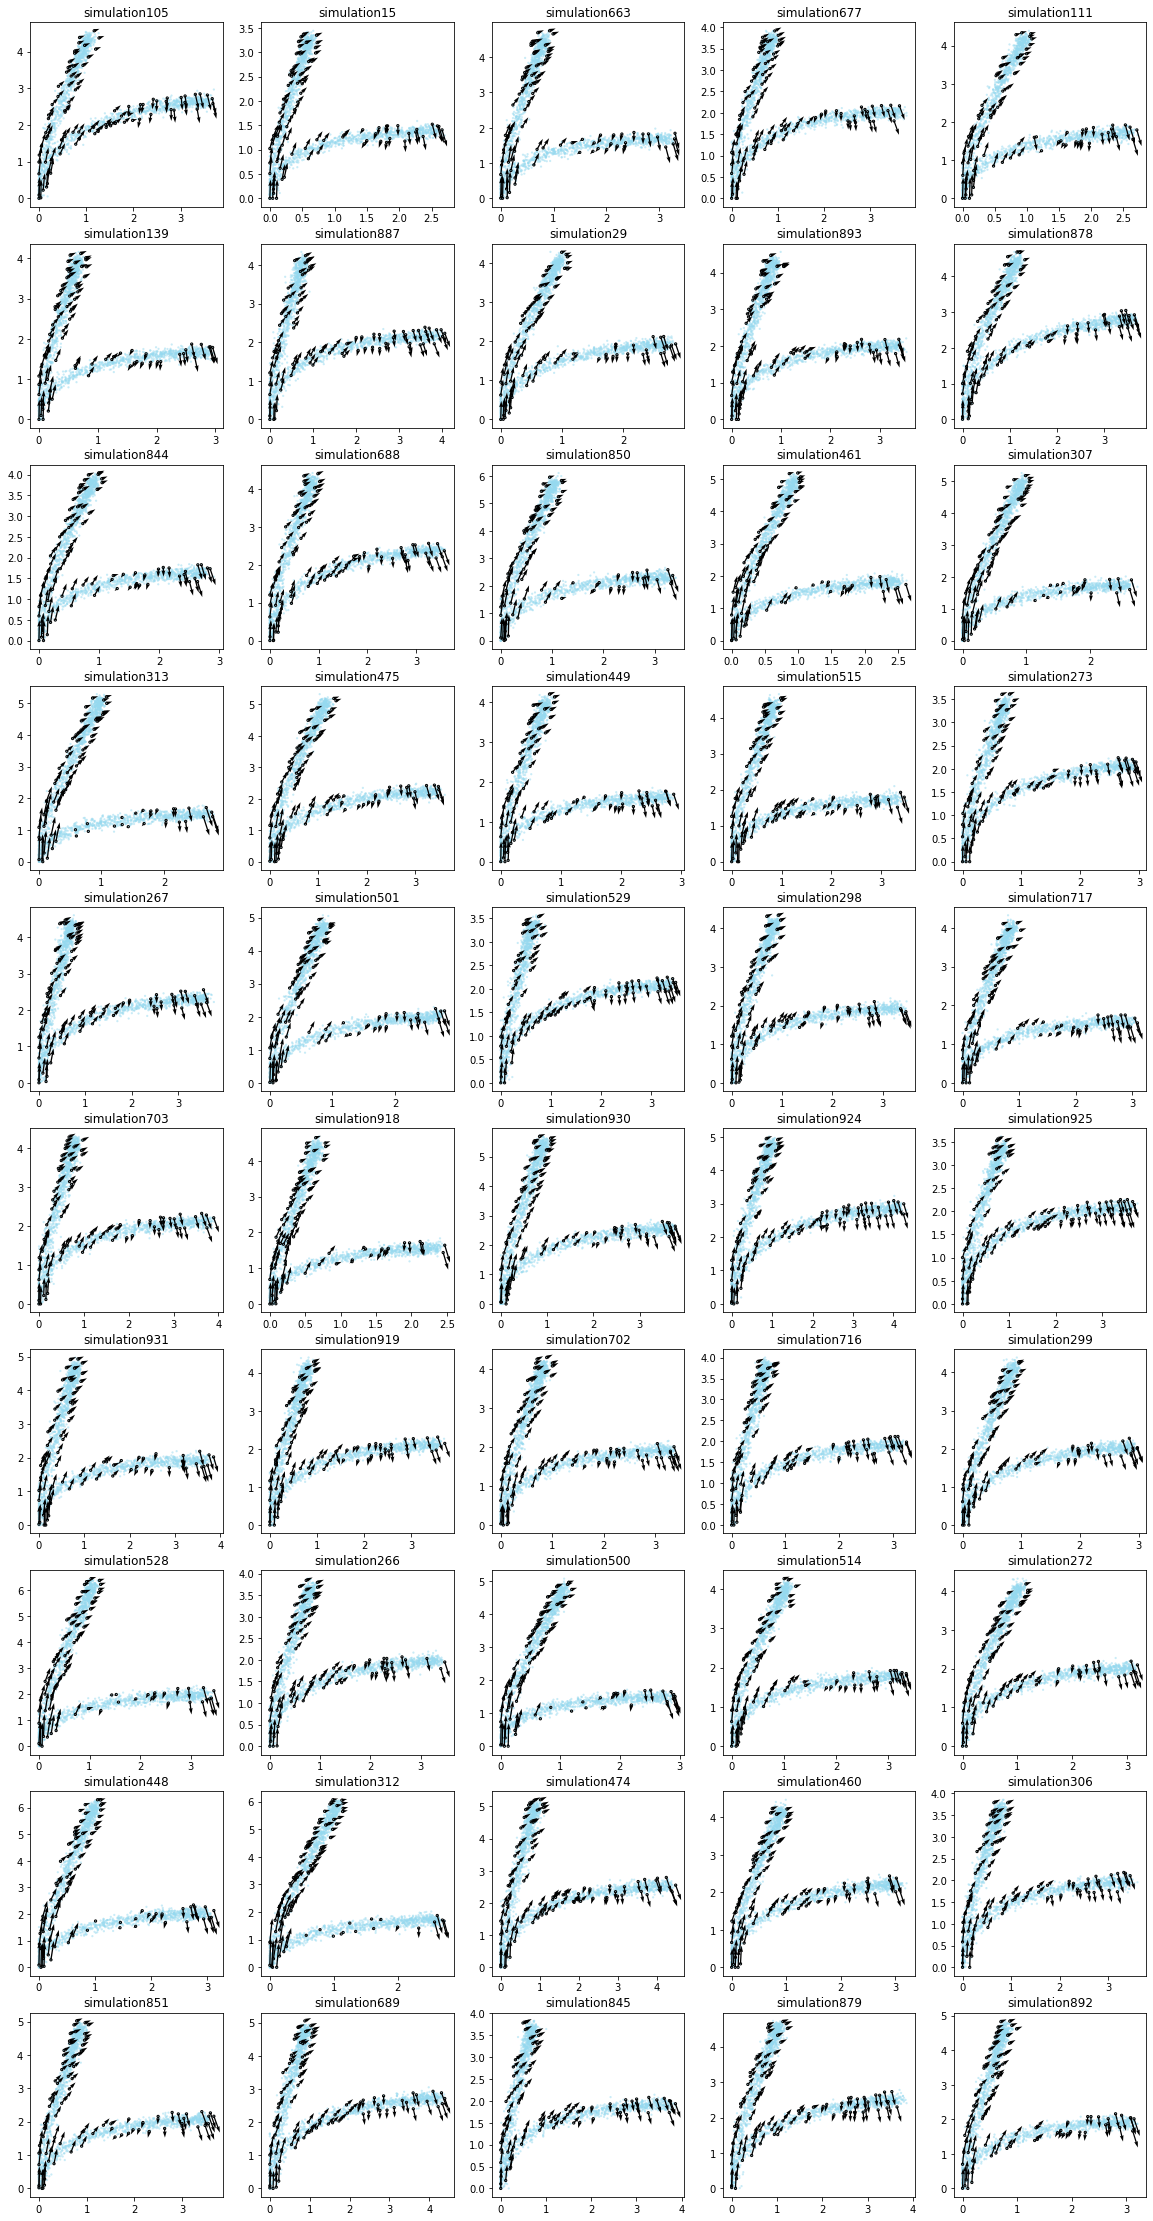

In [126]:
# gene_list=list(splice_unsplice_splice_predict_unsplice_predict_dynamic.gene_name.drop_duplicates())[0:10]

ncols=5
height=math.ceil(len(gene_list)/5)*4
fig = plt.figure(figsize=(20,height))

for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='splice',
        y='unsplice',
        cellDancer_df=splice_unsplice_splice_predict_unsplice_predict_dynamic,
        custom_xlim=None,
        custom_ylim=None,
        colors=None,
        alpha=0.5, 
        s = 5,
        velocity=True,
        gene=gene_list[i])
    
    ax.set_title(gene_list[i])
    # ax.axis('off')

plt.show()

### scvelo static

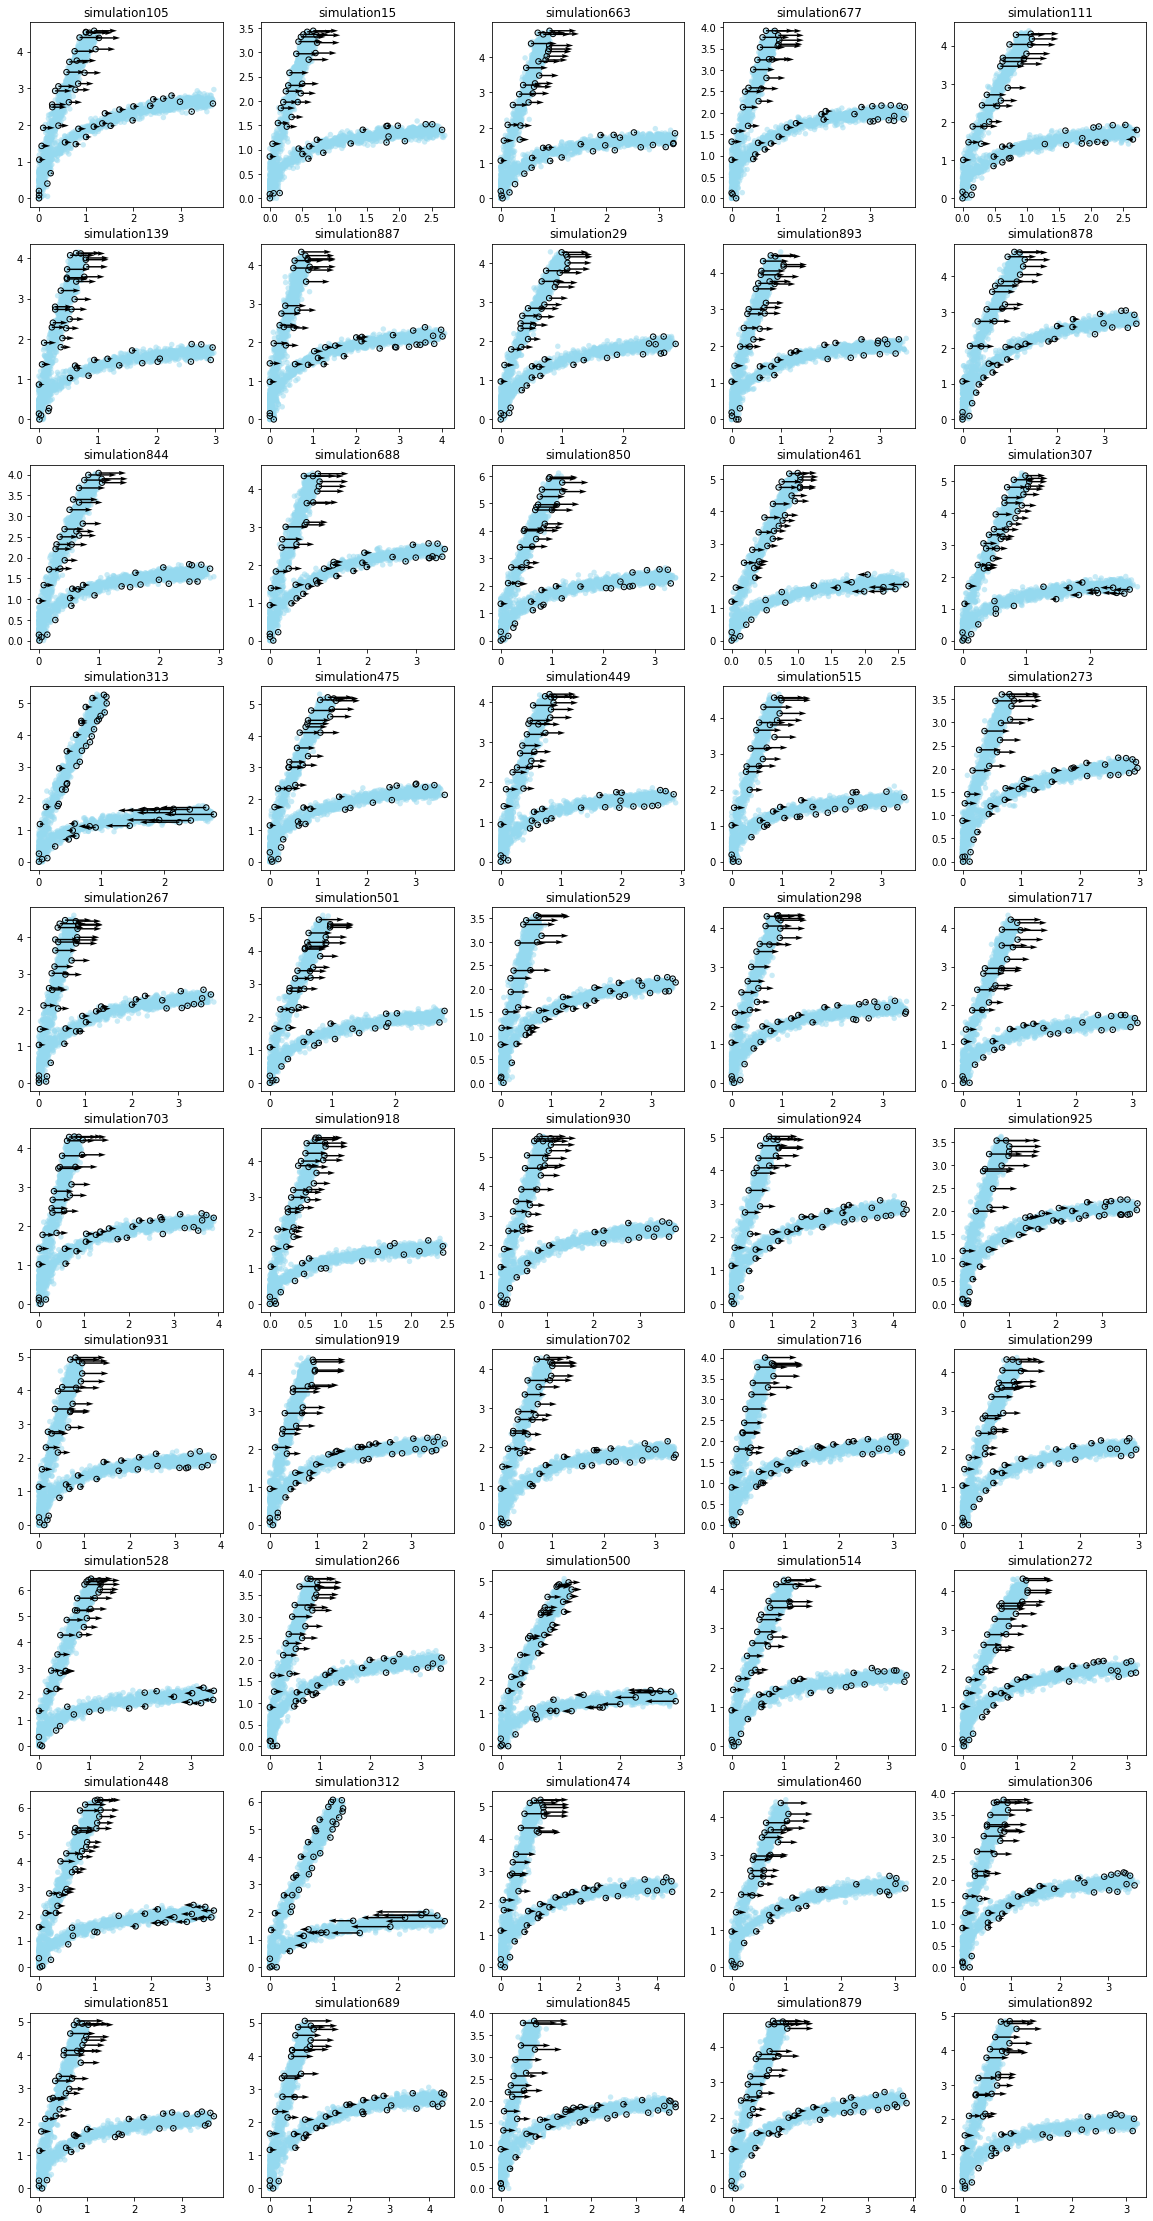

In [130]:
ncols=5
height=math.ceil(len(gene_list)/5)*4
fig = plt.figure(figsize=(20,height))

for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='splice',
        y='unsplice',
        cellDancer_df=splice_unsplice_splice_predict_unsplice_predict_static,
        custom_xlim=None,
        custom_ylim=None,
        colors=None,
        alpha=0.5, 
        s = 30,
        velocity=True,
        gene=gene_list[i],
        arrow_grid=(10,10))
    
    ax.set_title(gene_list[i])
    # ax.axis('off')

plt.show()

## save selection to plot

/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/multi_path_new/velocity_result/celldancer/ratio1/gene_velocity/


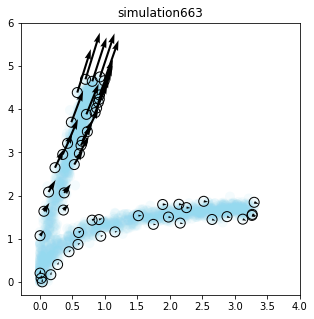

/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/multi_path_new/velocity_result/scv/ratio1/gene_velocity/dynamic_


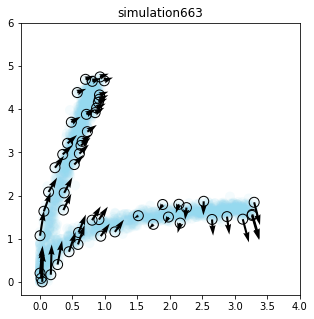

/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/multi_path_new/velocity_result/scv/ratio1/gene_velocity/static_


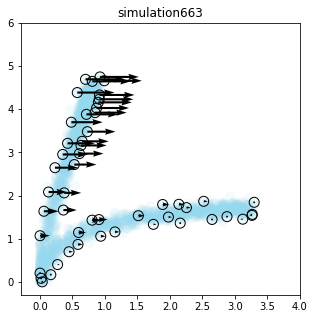

In [193]:
result_list=[cellDancer_df,splice_unsplice_splice_predict_unsplice_predict_dynamic,splice_unsplice_splice_predict_unsplice_predict_static]
result_dir=['/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/multi_path_new/velocity_result/celldancer/ratio1/gene_velocity/',
            '/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/multi_path_new/velocity_result/scv/ratio1/gene_velocity/dynamic_',
            '/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/multi_path_new/velocity_result/scv/ratio1/gene_velocity/static_']
# gene_list=list(cellDancer_df.gene_name.drop_duplicates())[0:50]
gene_list=['simulation663']


import math
for result, res_dir in zip(result_list,result_dir):
    print(res_dir)
    ncols=1
    fig = plt.figure(figsize=(5,5))

    for i in range(len(gene_list)):
        ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
        cdplt.gene.scatter_gene(
            ax=ax,
            x='splice',
            y='unsplice',
            cellDancer_df=result,
            custom_xlim=(-0.3,4),
            custom_ylim=(-0.3,6),
            colors=None,
            alpha=0.1, 
            s = 100,
            velocity=True,
            gene=gene_list[i],
        arrow_grid=(10,10))

        ax.set_title(gene_list[i])
        # ax.axis('off')
    plt.savefig(res_dir+gene_list[i]+'.pdf')
    plt.show()



